<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/C%C3%B3pia_de_%5BAWARI_DS_13_03%5D_Pr%C3%A1tica_Clustering_com_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://img.freepik.com/vetores-gratis/mulher-usando-olho-de-rosto-de-verificacao-movel_24908-56398.jpg?w=740&t=st=1703863756~exp=1703864356~hmac=f27340e7ea9482243102e7bca63254e4d5465b7180faa0ad60f58f0e9b742330" alt="Alternative text" />

# **Clustering com DBSACN**

## **Objetivo**

Nesta prática, vamos conhecer **DBSCAN**, um algoritmo de clustering (agrupamento) baseado em densidade, que pode ser usado para identificar clusters de qualquer forma em um conjunto de dados contendo ruído e *outliers*.

Para a prática, usaremos um dataset muito famoso, chamado [Iris](https://archive.ics.uci.edu/ml/datasets/iris), que permite determinar três tipos da flor Iris (Setosa, Versicolor e Virginica) por meio das características de suas pétalas.

Este dataset já vem embutido no Seaborn ( biblioteca gráfica), de modo que não precisaremos ter maior trabalho com isso.

## **Prática**

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


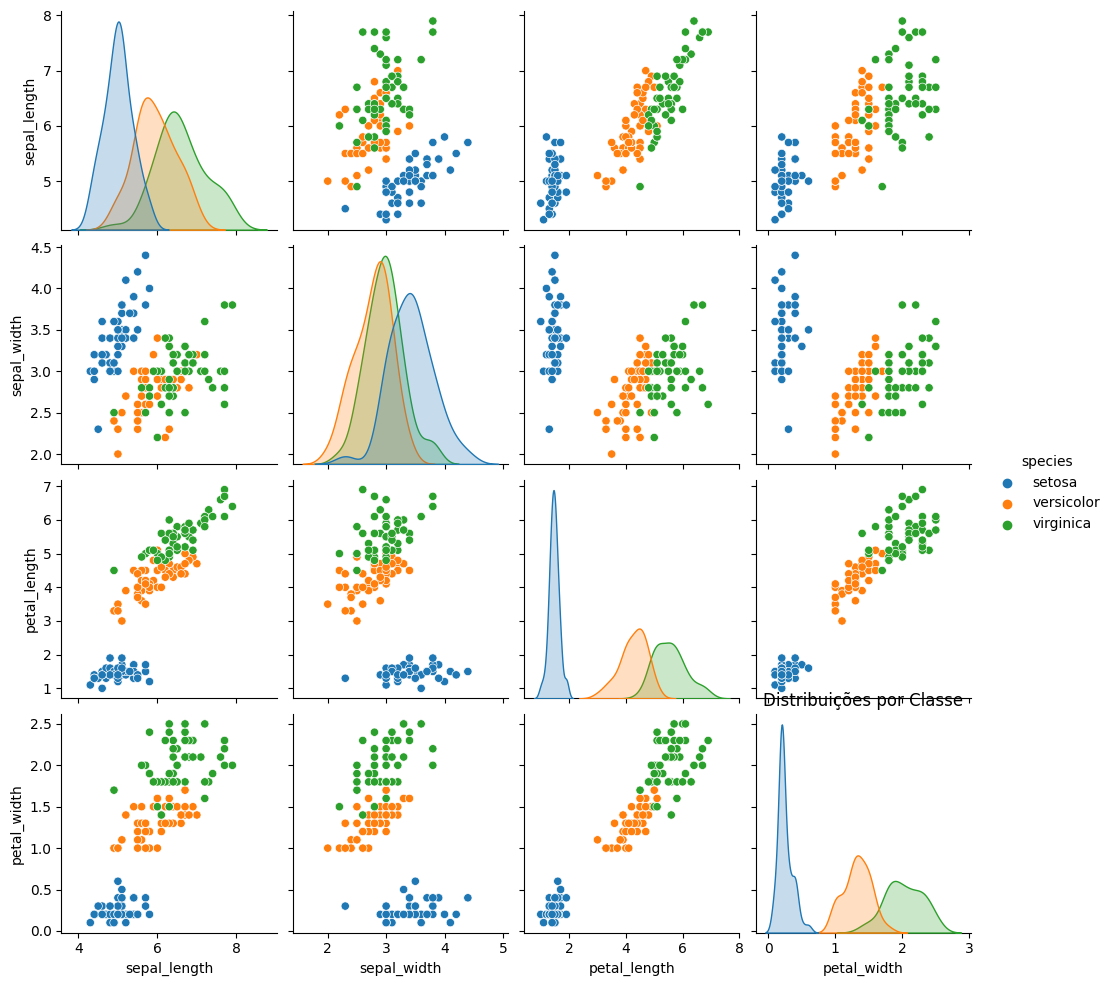

In [5]:
sns.pairplot(iris, hue="species")
plt.title("Distribuições por Classe")
plt.show()

In [6]:
X = iris[["petal_length",	"petal_width"]]

In [7]:
DBSCAN?
# Abre a ajuda do DBSCAN

In [8]:
dbscan=DBSCAN()
dbscan.fit(X)

DBSCAN()

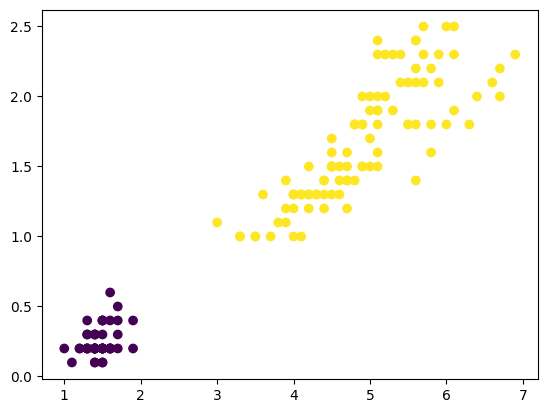

In [9]:
# Visualizando outputs
clusters = dbscan.labels_
plt.scatter(X["petal_length"], X["petal_width"], c = clusters)

In [10]:
result = X.copy()
result['cluster'] = clusters
result_silhueta = result[result.cluster>=0]
si_score = silhouette_score(result_silhueta[['petal_length', "petal_width"]],result_silhueta['cluster'])
print(f"score Agrupamento", si_score)

score Agrupamento 0.7669465622770762


In [11]:
np.log(X.shape[0])

5.0106352940962555

In [12]:
minPts = 5

In [13]:
nbrs.kneighbors?

Object `nbrs.kneighbors` not found.


In [14]:
## Optimal Epsilon
neigh = NearestNeighbors(n_neighbors=minPts)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [15]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

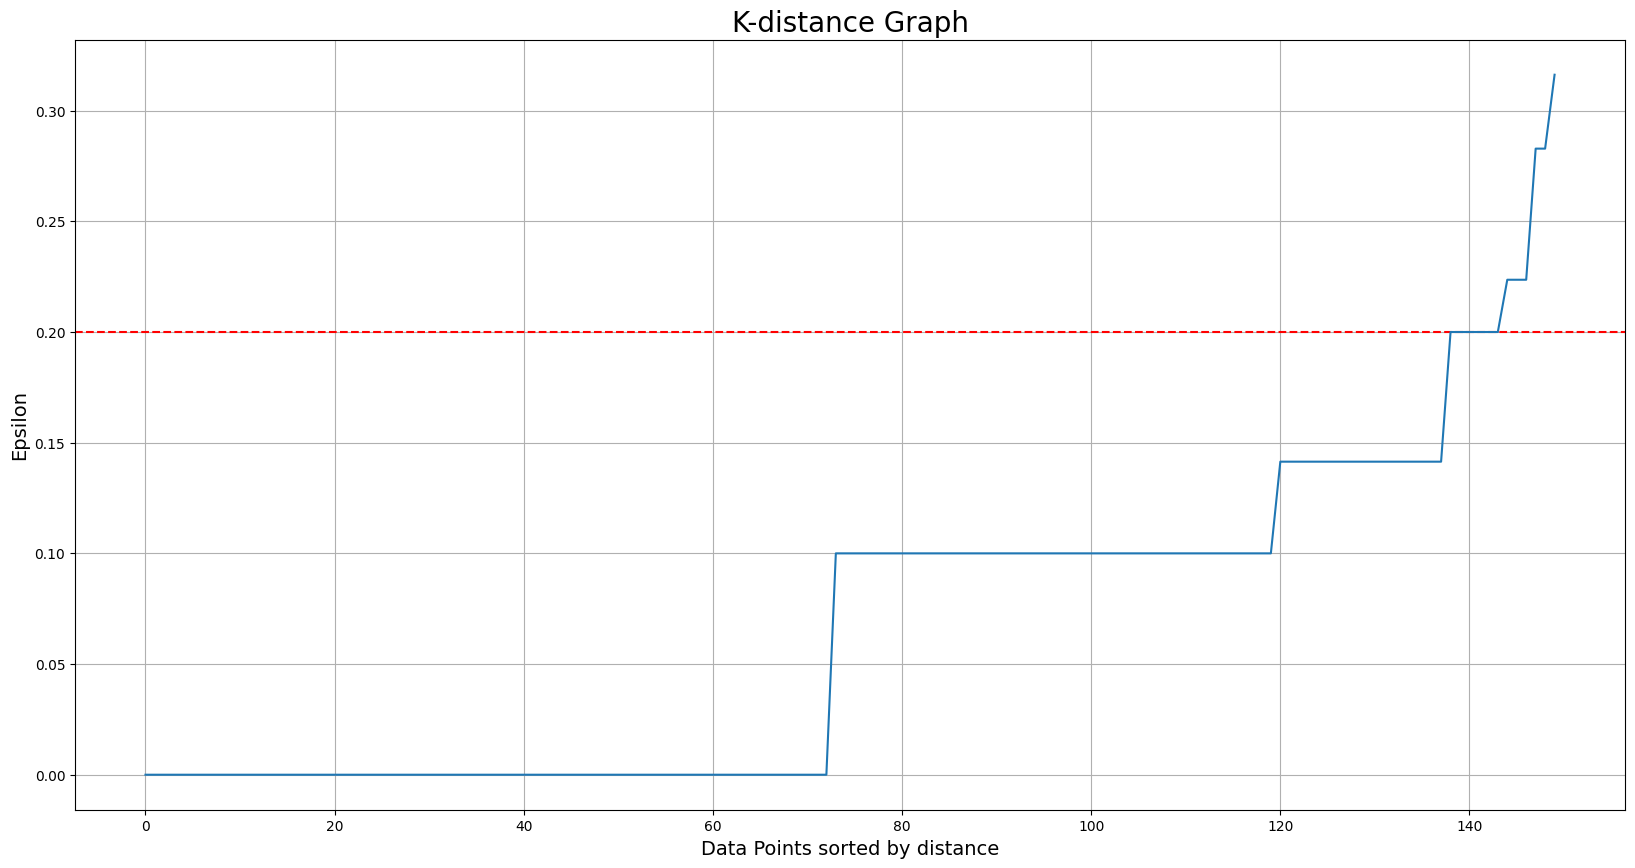

In [16]:
# Plotting K-distance Graph
plt.figure(figsize=(20,10))
plt.axhline(y=0.2, c="red", linestyle='--')
plt.plot(distances)
plt.grid()
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [17]:
# Input data
model = DBSCAN(eps = 0.225, min_samples = minPts).fit(X)

In [18]:
# Visualizando outputs
clusters = model.labels_
sns.scatterplot(X["petal_length"], X["petal_width"], hue = clusters, palette="Set2")
plt.show()

TypeError: ignored

In [19]:
result = X.copy()
result['cluster'] = clusters
result_silhueta = result[result.cluster>=0]
si_score = silhouette_score(result_silhueta[['petal_length', "petal_width"]],result_silhueta['cluster'])
print(f"score Agrupamento", si_score)

score Agrupamento 0.8019716112132936


In [20]:
# Visualizando outputs
clusters = model.labels_
sns.scatterplot(X["petal_length"], X["petal_width"], hue = iris.species, palette="husl")
plt.show()

TypeError: ignored

In [21]:
si_score = silhouette_score(X,iris.species)
print(f"score Agrupamento", si_score)

score Agrupamento 0.6409470397260941


---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**